In [1]:
import os,sys
from importlib import reload
import numpy as np
import pandas as pd
#import torch
print(os.getpid())
sys.path.append(r'/lab/weissman_imaging/puzheng/Softwares/') # parent folder of ChromAn

1624214


In [2]:
import re
import MERFISH_probe_design.IO.file_io as fio
import MERFISH_probe_design.probe_design.OTTable_dict as ot

from Bio.Seq import reverse_complement

# common parameters:
table_keylen = 17

In [3]:
reference_folder = r'/lab/solexa_weissman/puzheng/References/'
#reference_folder = r'\\wi-bigdata.wi.mit.edu\solexa_weissman\puzheng\References'
print(os.listdir(os.path.join(reference_folder, 'GRCm39', 'Transcriptome')))

mRNA_fasta_file = os.path.join(reference_folder, 'GRCm39', 'Transcriptome', 
                                      r'Mus_musculus.GRCm39.cdna.all.fa')
ncRNA_fasta_file = os.path.join(reference_folder, 'GRCm39', 'Transcriptome',
                                      r'Mus_musculus.GRCm39.ncrna.fa')
gff3_file = os.path.join(reference_folder, 'GRCm39', 'Transcriptome',
                                      r'Mus_musculus.GRCm39.109.gff3')


['Mus_musculus.GRCm39.ncrna.fa', 'rtRNA_15.table', '.DS_Store', 'Mus_musculus.GRCm39.cdna.all.fa', 'transcriptome_17.table', 'Mus_musculus.GRCm39.109.gff3']


In [6]:

import pickle
overwrite_ottable = False

mRNA = fio.load_fasta_into_df(mRNA_fasta_file)
ncRNAs =  fio.load_fasta_into_df(ncRNA_fasta_file)

In [ ]:
# Load the transcriptome as a pandas data frame
transcriptome_ottable_savefile = os.path.join(reference_folder, 'GRCm39', 'Transcriptome', 
                                              f'transcriptome_{table_keylen}.table')
if os.path.isfile(transcriptome_ottable_savefile):
    ottable_transcriptome = pickle.load(open(transcriptome_ottable_savefile, 'rb'))
else:
    transcriptome = pd.concat([mRNA, ncRNAs])
    transcriptome['FPKM'] = 1
    # OTTable for the transcriptome.
    if 'ottable_transcriptome' not in locals() or overwrite_ottable:
        ottable_transcriptome = ot.get_OTTable_for_transcriptome(transcriptome, table_keylen)
        # save pickle
        print(transcriptome_ottable_savefile)
        ottable_transcriptome.save_pkl(transcriptome_ottable_savefile)
    else:
        print("ottable_transcriptome already exist, skip.")

In [10]:
# rRNA and tRNA reference:
rtRNA_ottable_savefile = os.path.join(reference_folder, 'GRCm39', 'Transcriptome', 
                                              f'rtRNA_{15}.table')
if os.path.isfile(rtRNA_ottable_savefile):
    ottable_rtRNAs = pickle.load(open(rtRNA_ottable_savefile, 'rb'))
else:
    # OTTable for rRNA/tRNAs
    if 'ottable_rtRNAs' not in locals() or overwrite_ottable:
        ncRNAs =  fio.load_fasta_into_df(ncRNA_fasta_file)
        ottable_rtRNAs = ot.get_OTTable_for_rtRNAs(ncRNAs, 15)
    print(rtRNA_ottable_savefile)
    ottable_rtRNAs.save_pkl(rtRNA_ottable_savefile)

In [23]:
# generate a internal table for the targetsites:
target_site_ottable_savefile = os.path.join(library_folder, f'PE_target_site_{table_keylen}.table')



if os.path.isfile(target_site_ottable_savefile):
    ottable_target_site = pickle.load(open(target_site_ottable_savefile, 'rb'))
else:
    # loadtarget_sites:
    target_site_filename = os.path.join(library_folder, 'PETS_orthoSeq_targets.xlsx')
    target_df = pd.read_excel(target_site_filename)
    target_site = pd.DataFrame({'id':target_df['name'], 
                                'description':target_df['name'],
                                'sequence':target_df['seq'],
                               })
    target_site['FPKM'] = 1
    # OTTable for the target_site.
    if 'ottable_target_site' not in locals() or overwrite_ottable:
        ottable_target_site = ot.get_OTTable_for_transcriptome(target_site, table_keylen)
        # save pickle
        print(target_site_ottable_savefile)
        ottable_target_site.save_pkl(target_site_ottable_savefile)
    else:
        print("ottable_target_site already exist, skip.")

Construct a OTTable using 2171/2171 transcripts with FPKM > 0.
/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/PE_target_site_17.table
Wrote the OTTable to /lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/PE_target_site_17.table.


In [21]:
target_site

,id,description,sequence,FPKM
0,intID1,intID1,TGTATTTGTGAGGGCCCAACCACGACGTAAGGTGAATTGTTGCTGC...,1
1,intID2,intID2,GGATCTTACAGGACTACTCAAGTGGTGGTTTACGTTCCGTCTCACC...,1
2,intID3,intID3,TGGGAGTGAGCTTACCATCGAACAAATCCTTAGAGGCTGATGCTGG...,1
3,intID4,intID4,ATGTGCGGTAGCGCCCACTATTAGAGGCAGGCTAATCCCCTATGGA...,1
4,intID5,intID5,AATAATGCGTCTCCTGTAGGTTAAAGCAGGGCACCATCGTTGCTTA...,1
...,...,...,...,...
2166,intID2167,intID2167,AGTCAATCTAGACCATCCATTGCGTCAAGCGGCGTCTGTCTAATTC...,1
2167,intID2168,intID2168,CCCGGCCCAAATAAAATTTAGCCATGCGGCTTTCACCAAAACTCTG...,1
2168,intID2169,intID2169,CCTTTGTTAGCGCGACCAAAGGAGGTGATTTTCGGCACGCACACAC...,1
2169,intID2170,intID2170,ACACGTCCCCGGTATGATTCCTTGGGTAACTTTGATGCTGGACCGT...,1


In [11]:
pool_folder = r'/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites'
print(pool_folder)
library_folder = os.path.join(pool_folder, 'IntBC_MERFISH_v2')
print(library_folder)

/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites
/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2


In [12]:
os.listdir(library_folder)

['blank_merfish_barcodes.npy',
 'full_codebook.csv',
 '2024_2_7_probe_30ntNO.xlsx',
 '2024_2_7_merged_probes.xlsx',
 '~$2024_2_7_twist_merged_probes.xlsx',
 'PETS_orthoSeq_targets.xlsx',
 '2024_2_6_full_codebook.csv',
 '2024_2_7_skipped_probes.xlsx',
 '2024_2_7_probe_30ntIntBC.xlsx',
 'final_probe_transcriptome_counts.png',
 '2024_2_7_primers.xlsx',
 '2024_2_7_twist_merged_probes.xlsx',
 'sel_merfish_barcodes.npy']

In [13]:
# make sure probes'rc doesn't hit transcriptome
probe_basenames = [
 '2024_2_7_probe_30ntIntBC.xlsx',
]
probe_dfs = []
for _basename in probe_basenames:
    _filename = os.path.join(library_folder, _basename)
    probe_dfs.append(pd.read_excel(_filename))

In [14]:
from ChromAn.src.library_tools.assemble_probe import shuffle_readout

In [29]:
from copy import copy
from tqdm.notebook import tqdm

linker = 't'
new_count_th = 14
rt_count_th = 0
target_count_th = 20

readout_inds = [2,3,4] # first two are fwd_primer, target_rc

skipped_probes = []
final_probe_df = pd.DataFrame(columns=['Name','Sequence','Transcriptome','r_t_RNA','target_site'])

for _basename, _probe_df in zip(probe_basenames, probe_dfs):
    _lib_name = _basename.split(os.extsep)[0].split('_')[-1]
    for _i, _row in tqdm(_probe_df.iterrows()):
        _seq = _row['Sequence']
        _counts = ottable_transcriptome.calculate_count(reverse_complement(_seq.upper()), table_keylen)
        _rt_count = ottable_rtRNAs.total_count(reverse_complement(_seq.upper()), 15)
        _target_count = ottable_target_site.total_count(reverse_complement(_seq.upper()), table_keylen)
        
        # now try shuffle readout sequences
        _curr_total = np.sum(_counts)
        _curr_seq = copy(_seq)
        _curr_rt_count = _rt_count
        _curr_target_count = _target_count
        # shuffle if not passing threshold
        if _curr_total >= new_count_th or _curr_rt_count > rt_count_th or _curr_target_count > target_count_th:
            for _i_shuffle in range(100):
                _sf_seq = shuffle_readout(_seq, readout_inds=readout_inds, linker=linker) 
                _new_counts = ottable_transcriptome.calculate_count(reverse_complement(_sf_seq.upper()), 
                                                                    table_keylen)
                _new_rt_count = ottable_rtRNAs.total_count(reverse_complement(_sf_seq.upper()), 15)
                _new_target_site_count = ottable_target_site.total_count(reverse_complement(_sf_seq.upper()), table_keylen)
                if np.sum(_new_counts) < _curr_total and _new_rt_count <= _curr_rt_count:
                    _curr_total = np.sum(_new_counts)
                    _curr_seq = copy(_sf_seq)
                    _curr_rt_count = copy(_new_rt_count)
                    _curr_target_count = copy(_new_target_site_count)
                    #print(_i_shuffle, _new_rt_count)
                    if _curr_total == 0 and _curr_rt_count <= rt_count_th and _curr_target_count <= target_count_th:
                        break
            # if still not pass threshold, skip:
            if _curr_total >= new_count_th or _curr_rt_count > rt_count_th:
                _row['Library'] = _lib_name
                _row['Transcriptome'] = _curr_total
                _row['r_t_RNA'] = _curr_rt_count
                _row['target_site'] = _target_count
                skipped_probes.append(_row)
                continue
            #print(_curr_rt_count)
        # save this
        _line = pd.Series(
            {'Name':f"Library_{_lib_name}_fwd_"+_row['Name'], 
             'Sequence':_curr_seq, 
             'Transcriptome':_curr_total,
             'r_t_RNA':_curr_rt_count,
             'target_site':_curr_target_count
            },
        )
        final_probe_df.loc[len(final_probe_df)] = _line
    #break
    
skipped_probes = pd.DataFrame(skipped_probes)

0it [00:00, ?it/s]

In [34]:
final_probe_df

,Name,Sequence,Transcriptome,r_t_RNA,target_site
0,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtTTACGTCGTGGTTGGGCCCTCACAA...,0,0,14
1,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtATTTACGACTGAACGCAGCAACAAT...,0,0,16
2,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtGTGCGCCACAGATATAGGGCGAATC...,0,0,14
3,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtTAATACGGAGGAATTACAGCTTCAA...,0,0,14
4,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtAGACAGGGCGGCTACCTCAAGTAAC...,0,0,16
...,...,...,...,...,...
13013,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtGCTCAGGACTCCGATGAGATGACCC...,1,0,14
13014,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtGAGACTCCGCGTTGCACATCCAACG...,0,0,15
13015,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtGAAGAGCATTAAAATGAGCATCGAC...,0,0,14
13016,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtCGACGGAGAGTCTGAGGGTTAAGCA...,0,0,14


In [37]:
skipped_probes

,Name,Sequence,Library,Transcriptome,r_t_RNA,target_site
1854,W1A03_primer_2_intID310_probe_0_loc_0_readout_...,CCCGCAATGGCTGACAACCGtGTACTCCCGCTGTTCCAAGTAATGA...,30ntIntBC,0,1,15
2349,W1A03_primer_2_intID392_probe_3_loc_90_readout...,CCCGCAATGGCTGACAACCGtAGGTGAGGCCAACTCACAGGGAGTG...,30ntIntBC,0,2,14
3808,W1A03_primer_2_intID635_probe_4_loc_120_readou...,CCCGCAATGGCTGACAACCGtACAGTGCCCTAAAGTACCGCCAAGG...,30ntIntBC,0,1,14
7335,W1A03_primer_2_intID1223_probe_3_loc_90_readou...,CCCGCAATGGCTGACAACCGtTATAAGCCACCAGTCTAGACCTCGT...,30ntIntBC,0,1,14
9831,W1A03_primer_2_intID1639_probe_3_loc_90_readou...,CCCGCAATGGCTGACAACCGtAGCCGTTCAGGTCGATGCACAGTGG...,30ntIntBC,25,0,14
10199,W1A03_primer_2_intID1700_probe_5_loc_150_reado...,CCCGCAATGGCTGACAACCGtCACAATCTCCCAGAGCAGGCATGAC...,30ntIntBC,14,0,14
11343,W1A03_primer_2_intID1891_probe_3_loc_90_readou...,CCCGCAATGGCTGACAACCGtAAACTGATAAGAACAGCGAATTACA...,30ntIntBC,22,0,14
11819,W1A03_primer_2_intID1970_probe_5_loc_150_reado...,CCCGCAATGGCTGACAACCGtTCTACTATAGTATCATGGCGGAGTG...,30ntIntBC,14,0,16


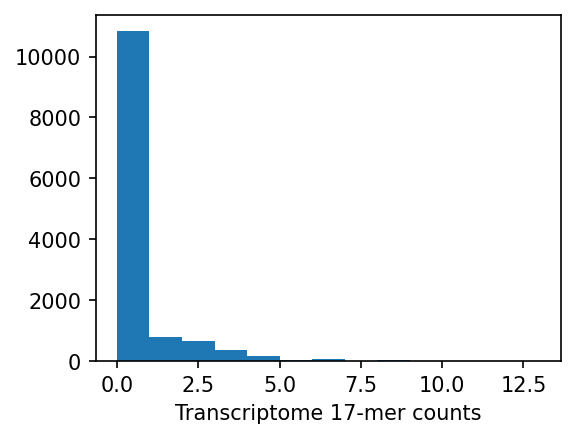

In [36]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.hist(final_probe_df['Transcriptome'].values, bins=np.arange(new_count_th))
ax.set_xlabel(f"Transcriptome {table_keylen}-mer counts")
fig.savefig(os.path.join(library_folder, 'final_probe_transcriptome_counts.png'), dpi=300, transparent=True)
plt.show()

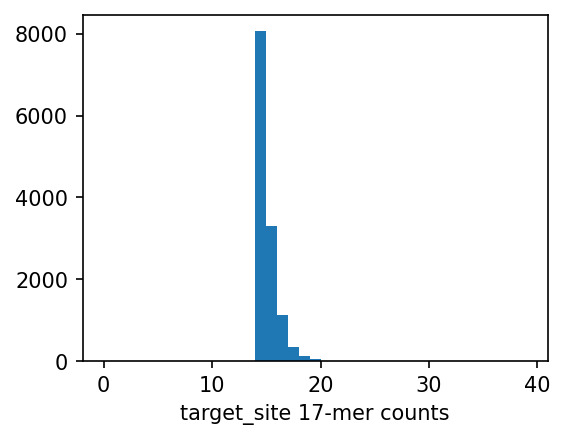

In [32]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
ax.hist(final_probe_df['target_site'].values, bins=np.arange(40))
ax.set_xlabel(f"target_site {table_keylen}-mer counts")
fig.savefig(os.path.join(library_folder, 'final_probe_target_site_counts.png'), dpi=300, transparent=True)
plt.show()

# save both

In [38]:
import time
final_probe_filename = os.path.join(library_folder,
    f"{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_merged_probes.xlsx")
skipped_probe_filename = os.path.join(library_folder,
    f"{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_skipped_probes.xlsx")
# save
print(f"saving final probes to file: {final_probe_filename}")
final_probe_df.to_excel(final_probe_filename, index=None)
print(f"saving skipped probes to file: {skipped_probe_filename}")
skipped_probes.to_excel(skipped_probe_filename, index=None)

saving final probes to file: /lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/2024_2_8_merged_probes.xlsx
saving skipped probes to file: /lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/2024_2_8_skipped_probes.xlsx


In [39]:
# save twist version:
twist_final_probes = pd.DataFrame(
    {
        "name": final_probe_df['Name'].values,
        "sequence": final_probe_df['Sequence'].values,
    }
)
twist_probe_filename = os.path.join(library_folder,
    f"{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_twist_merged_probes.xlsx")
print(f"saving twist probes to file: {twist_probe_filename}")
twist_final_probes.to_excel(twist_probe_filename, index=None)

saving twist probes to file: /lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/2024_2_8_twist_merged_probes.xlsx


In [40]:
final_probe_df

,Name,Sequence,Transcriptome,r_t_RNA,target_site
0,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtTTACGTCGTGGTTGGGCCCTCACAA...,0,0,14
1,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtATTTACGACTGAACGCAGCAACAAT...,0,0,16
2,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtGTGCGCCACAGATATAGGGCGAATC...,0,0,14
3,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtTAATACGGAGGAATTACAGCTTCAA...,0,0,14
4,Library_30ntIntBC_fwd_W1A03_primer_2_intID1_pr...,CCCGCAATGGCTGACAACCGtAGACAGGGCGGCTACCTCAAGTAAC...,0,0,16
...,...,...,...,...,...
13013,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtGCTCAGGACTCCGATGAGATGACCC...,1,0,14
13014,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtGAGACTCCGCGTTGCACATCCAACG...,0,0,15
13015,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtGAAGAGCATTAAAATGAGCATCGAC...,0,0,14
13016,Library_30ntIntBC_fwd_W1A03_primer_2_intID2171...,CCCGCAATGGCTGACAACCGtCGACGGAGAGTCTGAGGGTTAAGCA...,0,0,14


In [41]:
## save primers
fwd_primer_names, rev_primer_names = [],[]

for _n in final_probe_df['Name']:
    fwd_primer_names.append(_n.split('fwd_')[1].split('_intID')[0])
    rev_primer_names.append('W1'+_n.split('_W1')[-1])
fwd_primer_names = np.unique(fwd_primer_names)
rev_primer_names = np.unique(rev_primer_names)

In [42]:
from ChromAn.src.library_tools.primers import load_fasta_to_DataFrame
primer_folder = r'/lab/solexa_weissman/puzheng/References/Primers'

# fwd
forward_primers = load_fasta_to_DataFrame(os.path.join(primer_folder, 'forward_primers_keep.fasta'))
reverse_primers = load_fasta_to_DataFrame(os.path.join(primer_folder, 'reverse_primers_keep.fasta'))

In [43]:
used_fwd_primers = pd.DataFrame([_row for _i, _row in forward_primers.iterrows() if _row['Name'] in fwd_primer_names])

In [44]:
used_rev_primers = pd.DataFrame([_row for _i, _row in reverse_primers.iterrows() if _row['Name'] in rev_primer_names])

In [45]:
primers = pd.concat([used_fwd_primers, used_rev_primers])
primers['Scale'] = '25nm'
primers['Purification'] = 'STD'
# save

primer_filename = os.path.join(library_folder, 
                               f"{time.localtime().tm_year}_{time.localtime().tm_mon}_{time.localtime().tm_mday}_primers.xlsx")
print(primer_filename)
primers.to_excel(primer_filename, index=None)

/lab/solexa_weissman/puzheng/MERFISH_Probes/PE_TS/NewTargetSites/IntBC_MERFISH_v2/2024_2_8_primers.xlsx


In [46]:
primers

,Name,Sequence,Scale,Purification
1,W1A03_primer_2,CCCGCAATGGCTGACAACCG,25nm,STD
4,W1A10_primer_9,TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG,25nm,STD


In [47]:
used_rev_primers

,Name,Sequence
4,W1A10_primer_9,TAATACGACTCACTATAGGGATTGCCGCATGGTTTCCG


In [49]:
len(final_probe_df) / 6

2169.6666666666665